# Pruebas clasificadores

/home/roberto/Documentos/us/practicas/aia/trabajo/clasificadores_lineales.py:347: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-wx))


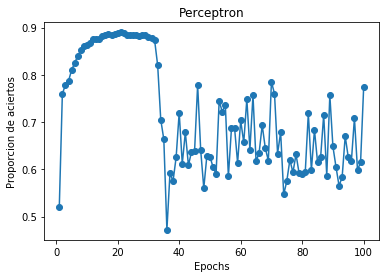

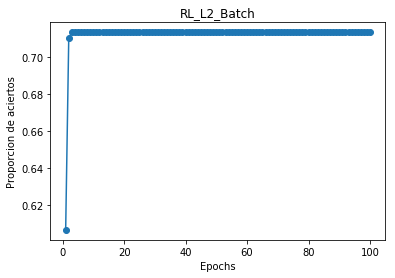

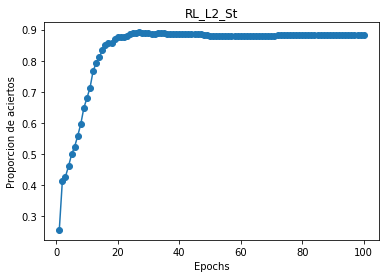

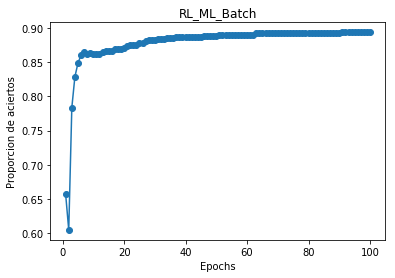

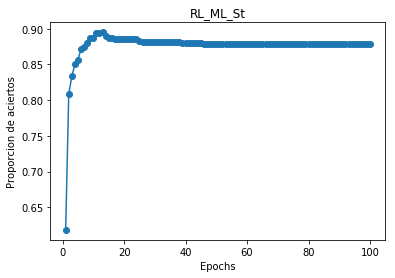

In [1]:
from clasificadores_lineales import *
import numpy as np

In [2]:
# Generamos un conjunto de datos linealmente separables, 
X1,Y1=genera_conjunto_de_datos_l_s(4,8,400)

# Lo partimos en dos trozos:
X1e,Y1e=X1[:300],Y1[:300]

X1t,Y1t=X1[300:],Y1[300:]

# Creamos el clasificador (perceptrón umbral en este caso): 
clas_pb1=Clasificador_Perceptron([0,1], normalizacion = True)

# Lo entrenamos con elprimero de los conjuntos de datos:
clas_pb1.entrena(X1e,Y1e,100,rate_decay=True,rate=0.001)

# Clasificamos un ejemplo del otro conjunto, y lo comparamos con su clase real:
clas_pb1.clasifica(X1t[0]),Y1t[0]

sum(clas_pb1.clasifica(x) == y for x,y in zip(X1t,Y1t))/len(Y1t)

0.98999999999999999

In [3]:
#Igual pero con datos NO linealmente separables
X2,Y2 = genera_conjunto_de_datos_n_l_s(4,8,400,0.1)

X2e,Y2e=X2[:300],Y2[:300]

X2t,Y2t=X2[300:],Y2[300:]

clas_pb2=Clasificador_Perceptron([0,1])

clas_pb2.entrena(X2e,Y2e,100,rate_decay=True,rate=0.001)

clas_pb2.clasifica(X2t[0]),Y2t[0]

print(sum(clas_pb2.clasifica(x) == y for x,y in zip(X2t,Y2t))/len(Y2t))

0.84


In [4]:
X1,Y1=genera_conjunto_de_datos_l_s(4,8,400)

# Lo partimos en dos trozos:
X1e,Y1e=X1[:300],Y1[:300]

X1t,Y1t=X1[300:],Y1[300:]

# Creamos el clasificador (perceptrón umbral en este caso): 
clas_pb1=Clasificador_RL_L2_Batch([0,1])

# Lo entrenamos con elprimero de los conjuntos de datos:
clas_pb1.entrena(X1e,Y1e,100,rate_decay=True,rate=0.001)

# Clasificamos un ejemplo del otro conjunto, y lo comparamos con su clase real:
clas_pb1.clasifica(X1t[0]),Y1t[0]

sum(clas_pb1.clasifica(x) == y for x,y in zip(X1t,Y1t))/len(Y1t)

/home/roberto/Documentos/us/practicas/aia/trabajo/clasificadores_lineales.py:347: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-wx))


0.87

In [5]:
X1,Y1=genera_conjunto_de_datos_l_s(4,8,400)

# Lo partimos en dos trozos:
X1e,Y1e=X1[:300],Y1[:300]

X1t,Y1t=X1[300:],Y1[300:]

# Creamos el clasificador (perceptrón umbral en este caso): 
clas_pb1=Clasificador_RL_L2_St([0,1], normalizacion = True)

# Lo entrenamos con elprimero de los conjuntos de datos:
clas_pb1.entrena(X1e,Y1e,100,rate_decay=True,rate=0.001)

# Clasificamos un ejemplo del otro conjunto, y lo comparamos con su clase real:
clas_pb1.clasifica(X1t[0]),Y1t[0]

sum(clas_pb1.clasifica(x) == y for x,y in zip(X1t,Y1t))/len(Y1t)

0.93000000000000005

In [6]:
X1,Y1=genera_conjunto_de_datos_l_s(4,8,400)

# Lo partimos en dos trozos:
X1e,Y1e=X1[:300],Y1[:300]

X1t,Y1t=X1[300:],Y1[300:]

# Creamos el clasificador (perceptrón umbral en este caso): 
clas_pb1=Clasificador_RL_ML_Batch([0,1])

# Lo entrenamos con elprimero de los conjuntos de datos:
clas_pb1.entrena(X1e,Y1e,100,rate_decay=True,rate=0.001)

# Clasificamos un ejemplo del otro conjunto, y lo comparamos con su clase real:
clas_pb1.clasifica(X1t[0]),Y1t[0]

sum(clas_pb1.clasifica(x) == y for x,y in zip(X1t,Y1t))/len(Y1t)

/home/roberto/Documentos/us/practicas/aia/trabajo/clasificadores_lineales.py:347: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-wx))


0.93000000000000005

In [7]:
X1,Y1=genera_conjunto_de_datos_l_s(4,8,400)

# Lo partimos en dos trozos:
X1e,Y1e=X1[:300],Y1[:300]

X1t,Y1t=X1[300:],Y1[300:]

# Creamos el clasificador (perceptrón umbral en este caso): 
clas_pb1=Clasificador_RL_ML_St([0,1])

# Lo entrenamos con elprimero de los conjuntos de datos:
clas_pb1.entrena(X1e,Y1e,100,rate_decay=True,rate=0.001)

# Clasificamos un ejemplo del otro conjunto, y lo comparamos con su clase real:
clas_pb1.clasifica(X1t[0]),Y1t[0]

sum(clas_pb1.clasifica(x) == y for x,y in zip(X1t,Y1t))/len(Y1t)

0.95999999999999996

### One vs Rest

In [8]:
from iris import *
for i, clase in enumerate(iris_entr_clas):
    if clase == iris_clases[0]:
        iris_entr_clas[i] = 0
    elif clase == iris_clases[1]:
        iris_entr_clas[i] = 1
    else:
        iris_entr_clas[i] = 2
print(iris_entr_clas)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [9]:
entr = np.array(iris_entr)
entr_clas = np.array(iris_entr_clas)
clasificador = Clasificador_RL_OvR(Clasificador_RL_ML_St, [0, 1, 2])
clasificador.entrena(entr, entr_clas, 500, rate_decay=True, rate=0.01)
print(iris_clases)
print(clasificador.clasifica(entr[25]),entr_clas[25])
print(clasificador.clasifica(entr[78]),entr_clas[78])

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
0 0
2 1


### RL Softmax

In [10]:
entr = np.array(iris_entr)
entr_clas = np.array(iris_entr_clas)
clasificador = Clasificador_RL_Softmax([0, 1, 2])
clasificador.entrena(entr, entr_clas, 500, rate_decay=False, rate=0.01)
print(iris_clases)
print(clasificador.clasifica(entr[25]),entr_clas[25])
print(clasificador.clasifica(entr[78]),entr_clas[78])

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
0 0
0 1


#### Rendimiento

In [11]:
rendimiento(clasificador, entr, entr_clas)

0.6666666666666666

## Pruebas de Numpy

In [12]:
a = np.array([[9987.7,54.8,3],[4,45,20]])
media = np.mean(a, axis = 0)
desviacion = np.std(a, axis = 0)
#a = (a - media) / desviacion
for ej in np.nditer(a):
    print(ej)

9987.7
54.8
3.0
4.0
45.0
20.0


In [13]:
a = np.array([1,2,2,2,3,4,5,3,4])
a[a != 3] = 0
a[a == 3] = 1
a

array([0, 0, 0, 0, 1, 0, 0, 1, 0])